In [1]:
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt
from copy import deepcopy
import time

from graph_tools import Graph
from laplacian_tools import Laplacian_Handler

# Original Graph

In [2]:
waypoints = np.array([
    [0, 0],
    [100, 0],
    [100, 20],
    [0, 20],
    [0, 40],
    [100, 40],
    [100, 60],
    [0, 60],
    [0, 80],
    [100, 80],
    [100, 100],
    [0, 100],
    [0, 0],
    [20, 0],
    [20, 100],
    [40, 100],
    [40, 0],
    [60, 0],
    [60, 100],
    [80, 100],
    [80, 0],
    [100, 0]
])

Laplacian: 3.561637656912172e+122


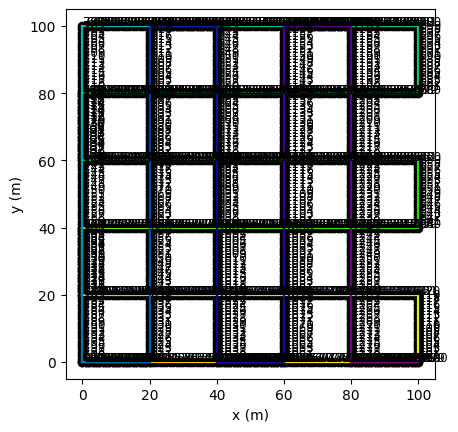

In [4]:
g = Graph(waypoints=waypoints)
g.plot()
l = Laplacian_Handler(g)
print(f"Laplacian: {l.lap_det}")
# f = plt.gcf()
# f.set_dpi(300)
# plt.savefig("/home/masonbp/class/18.0651_matrix/project/18.0651_final/figs/timing_graph.pdf")

num_nodes: 1301
Average time for our method: 0.0026690072961993443
Average time for baseline method: 0.05654645607528276
Total time to run our method: 3.4723784923553467
Total time to run baseline method: 73.56693935394287


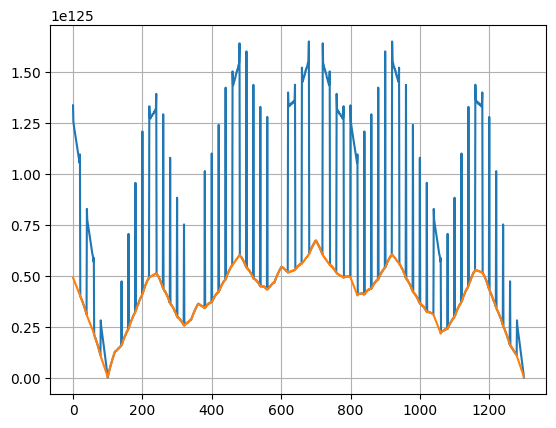

In [6]:
orig_det = la.det(g.reduced_laplacian())

lap_dets = []
lap_dets_est = []
lap_dets_minus_odom = []
num_odom = []
num_nodes = len(g.graph_keys)

t_ours = []
t_baseline = []

for i in range(num_nodes):
    t_start = time.time()
    new_lap_det = l.simulate_traveling_to_waypoint(l.graph.graph_keys[i])
    t_ours.append(time.time() - t_start)
    
    lap_dets_est.append(new_lap_det)
    # lap_dets_minus_odom.append(new_lap_det - np.exp(l.num_odom_to_waypoint(l.graph.graph_keys[i])))
    num_odom.append(l.num_odom_to_waypoint(l.graph.graph_keys[i]))
    g_cp = deepcopy(g)
    g_cp.add_nodes_to_waypoint(g.graph_keys[i])
    # print(g.graph_keys[i])
    # g_cp.plot()

    t_start = time.time()
    lap_dets.append(la.det(g_cp.reduced_laplacian()))
    t_baseline.append(time.time() - t_start)
    
    # lap_dets.append(new_lap_det)
    # print(f"{i}: {new_lap_det}")

print(f"num_nodes: {num_nodes}")
print(f"Average time for our method: {np.mean(t_ours)}")
print(f"Average time for baseline method: {np.mean(t_baseline)}")
print(f"Total time to run our method: {np.sum(t_ours)}")
print(f"Total time to run baseline method: {np.sum(t_baseline)}")

    
plt.plot(np.arange(num_nodes), lap_dets)
plt.plot(np.arange(num_nodes), lap_dets_est)
# plt.plot(np.arange(num_nodes), lap_dets_minus_odom)
plt.grid(True)

Text(0.5, 0, 'Node number')

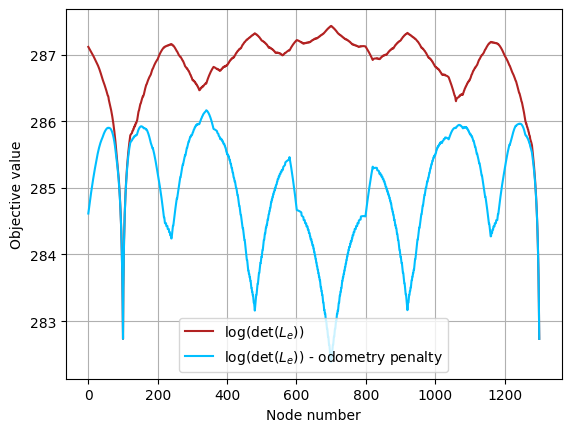

In [14]:
# plt.plot(np.arange(num_nodes), np.log(lap_dets))
plt.plot(np.arange(num_nodes), np.log(lap_dets_est), color='firebrick', label=r"log(det($L_e$))")
plt.plot(np.arange(num_nodes), np.log(lap_dets_est) - 2.5e-4*np.array(num_odom)**2, color='deepskyblue', label=r"log(det($L_e$)) - odometry penalty")
# plt.plot(np.arange(num_nodes), lap_dets_minus_odom)
plt.grid(True)
plt.legend()
plt.ylabel("Objective value")
plt.xlabel("Node number")

Idea: What if the c parameter for balancing odometry and improving the Laplacian is determined so that other than staying where the robot currently is, the next worst option has the same objective score.